# 🧬 Dimensionality Reduction with SHAP & LIME
This notebook applies PCA for dimensionality reduction and explains the first component using SHAP and LIME.

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
import shap
from sklearn.manifold import TSNE
import umap.umap_ as umap
from lime import lime_tabular

sns.set(style="whitegrid")

In [38]:
# Load and clean the dataset
df = pd.read_csv('New_Datasets/Data.csv')
df = df.dropna()

# Keep only numeric columns
df_numeric = df.select_dtypes(include=[np.number])
feature_names = df_numeric.columns
print("Shape of numeric data:", df_numeric.shape)
df_numeric.head()


Shape of numeric data: (1092, 503)


C:\Users\kashi\AppData\Local\Temp\ipykernel_31620\2108034289.py:2: DtypeWarning: Columns (678,688,690,692) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('New_Datasets/Data.csv')


patient_id  age_at_diagnosis  chemotherapy  cohort  \
1           2             43.19             0     1.0   
4           8             76.97             1     1.0   
5          10             78.77             0     1.0   
8          28             86.41             0     1.0   
9          35             84.22             0     1.0   

   neoplasm_histologic_grade  hormone_therapy  lymph_nodes_examined_positive  \
1                        3.0                1                            0.0   
4                        3.0                1                            8.0   
5                        3.0                1                            0.0   
8                        3.0                1                            1.0   
9                        2.0                0                            0.0   

   mutation_count  nottingham_prognostic_index  overall_survival_months  ...  \
1             2.0                        4.020                84.633333  ...   
4             2.0                        6.080                41.366667  ...   
5             4.0                        4.062                 7.800000  ...   
8             4.0                        5.032                36.566667  ...   
9             5.0                        3.056                36.266667  ...   

   srd5a1  srd5a2  srd5a3     st7    star    tnk2   tulp4  ugt2b15  ugt2b17  \
1 -0.4412  0.4534  0.4068  0.7634  0.0231  0.9121 -0.9538  -0.2264   0.5398   
4 -0.5845 -0.3544 -1.0150  2.2961  0.1817 -0.1572  0.0427   5.0048   3.8476   
5 -0.3910  0.0395  0.8191  0.1977 -0.2302 -0.5092 -0.3021   0.9357  -0.4217   
8 -0.3917 -0.1405 -0.9780 -0.3030 -0.1640  1.0783  1.8263  -0.5965   0.1502   
9 -0.3020 -0.4788  3.6125  1.9925  0.2253 -0.8414  1.7093  -0.6921   0.6906   

   ugt2b7  
1 -0.8920  
4  1.3223  
5  0.5340  
8 -0.8837  
9 -0.8006  

[5 rows x 503 columns]

In [40]:
# Keep only numeric columns (drop non-numeric ones like strings)
df_numeric = df.select_dtypes(include=[np.number])

# Now standardize only the numeric data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_numeric)

# Optional: Keep track of feature names
feature_names = df_numeric.columns


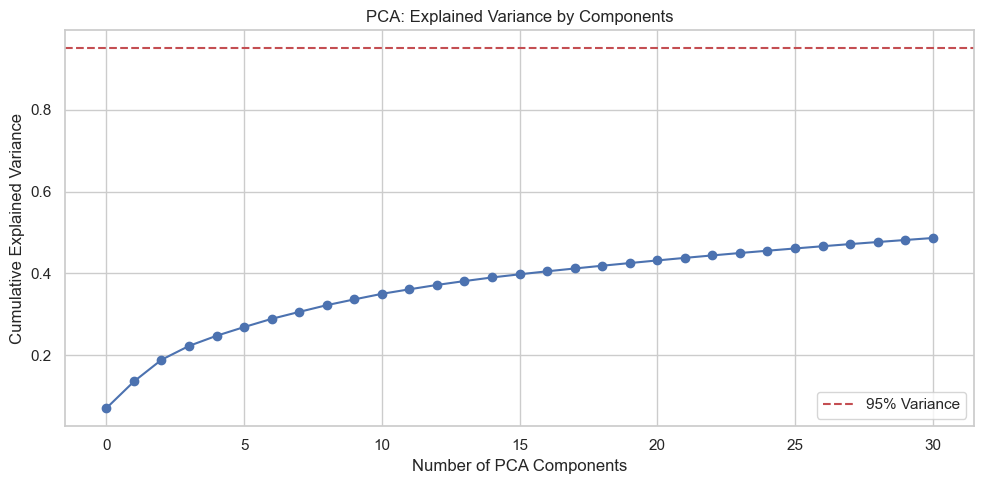

In [42]:
# Apply PCA to capture 95% variance
pca = PCA(n_components=31)
X_pca = pca.fit_transform(X_scaled)

# Explained variance plot
plt.figure(figsize=(10, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance')
plt.xlabel("Number of PCA Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA: Explained Variance by Components")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

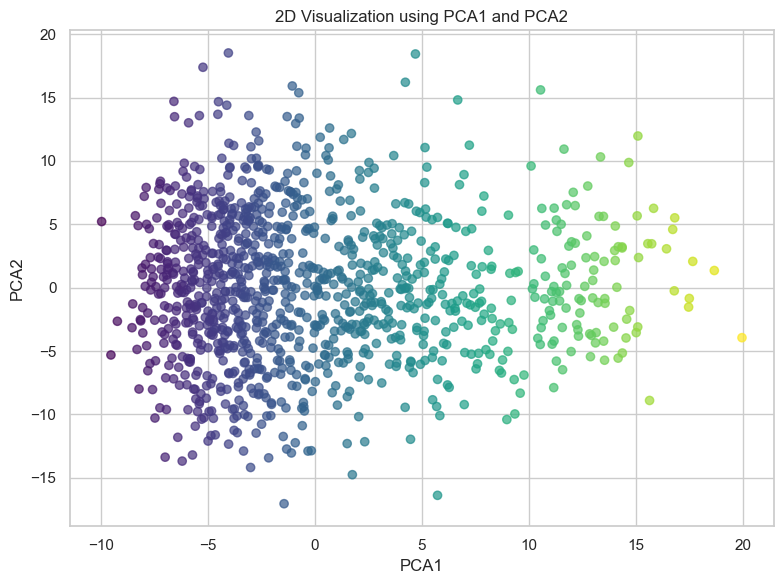

In [44]:
# Visualize PCA1 vs PCA2
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.7, c=X_pca[:, 0], cmap='viridis')
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.title("2D Visualization using PCA1 and PCA2")
plt.grid(True)
plt.tight_layout()
plt.show()

Explaining PCA Component 1


 98%|===================| 1074/1092 [00:39<00:00]        

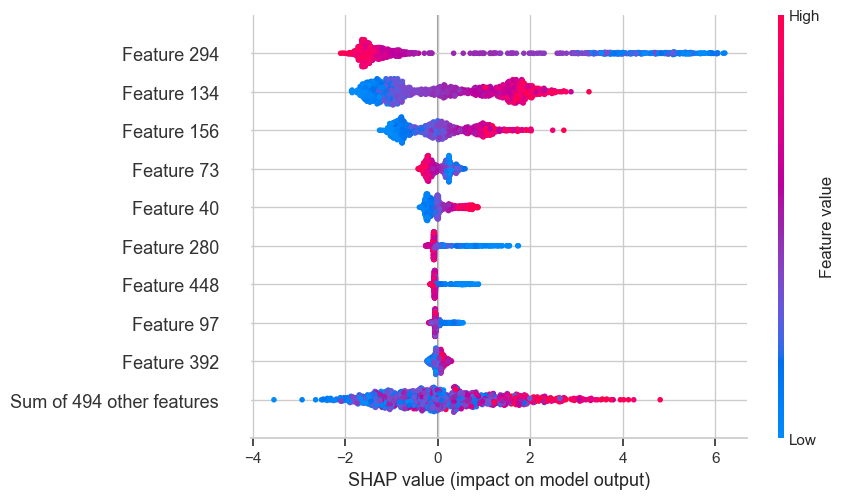

Explaining PCA Component 2


 98%|===================| 1069/1092 [00:33<00:00]        

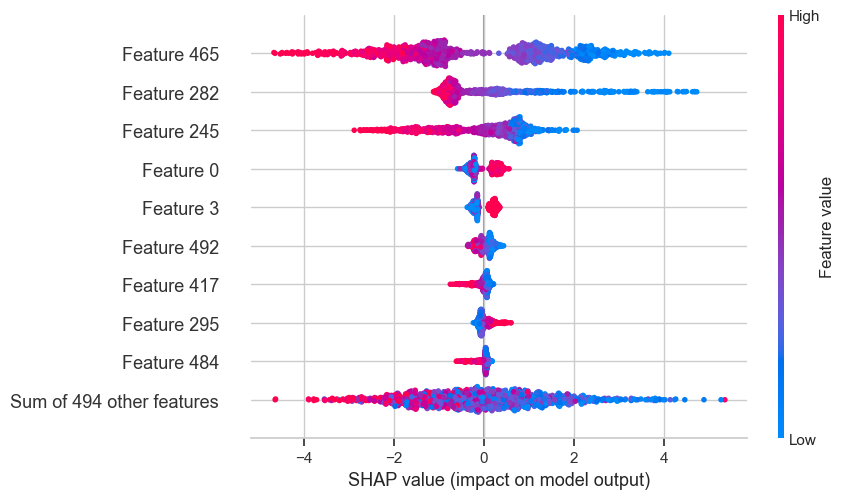

Explaining PCA Component 3


 97%|=================== | 1063/1092 [00:38<00:01]       

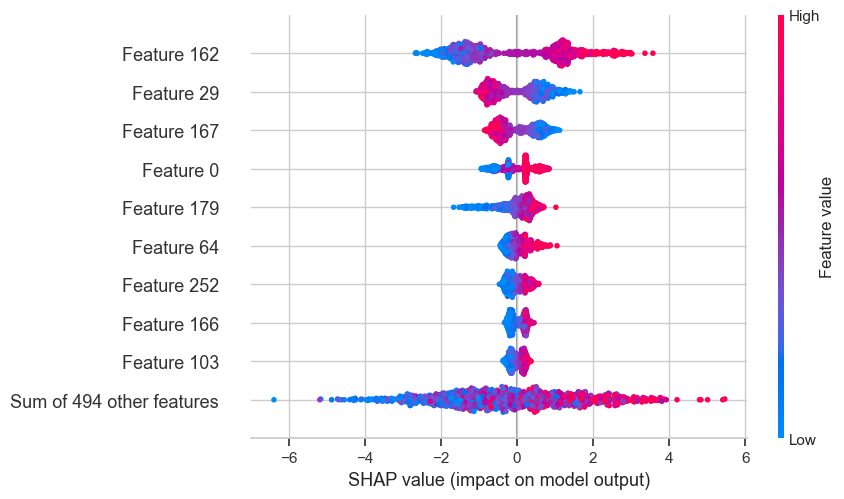

Explaining PCA Component 4


 98%|===================| 1068/1092 [00:32<00:00]        

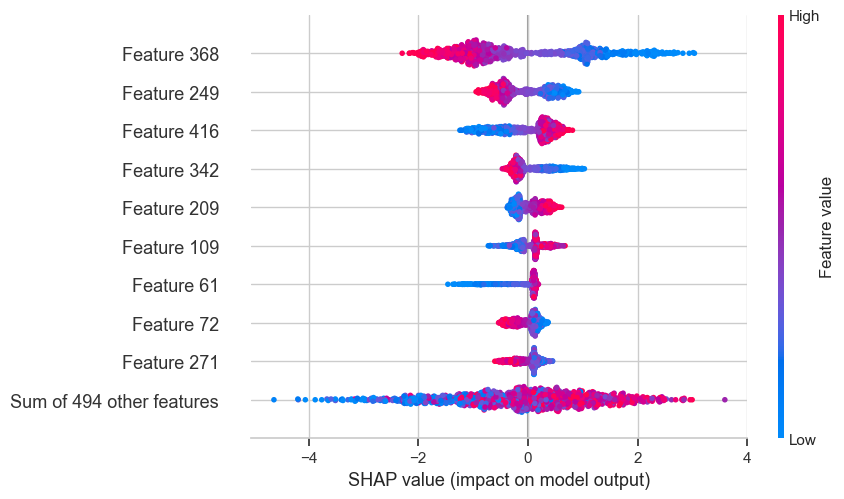

Explaining PCA Component 5


 98%|===================| 1069/1092 [00:29<00:00]        

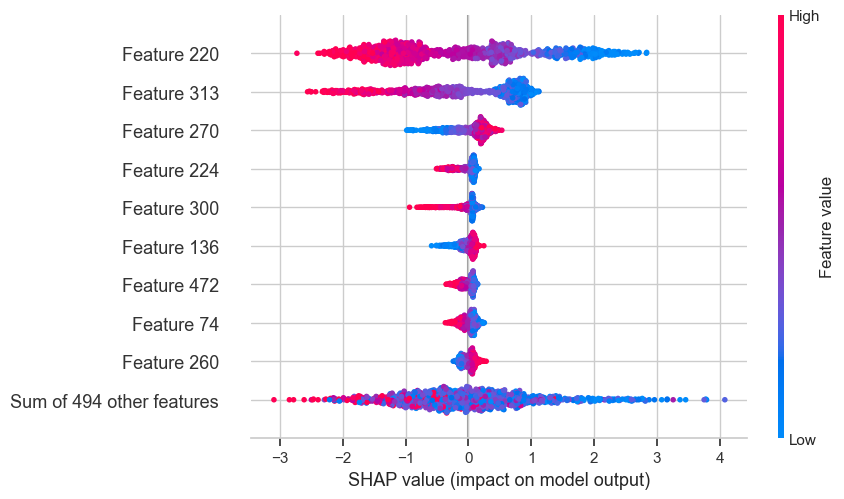

In [46]:
# Explain top 5 PCA components using SHAP
for i in range(5):
    print(f"Explaining PCA Component {i+1}")
    target = X_pca[:, i]
    
    # Train model to predict PCA component
    model = RandomForestRegressor(random_state=42)
    model.fit(X_scaled, target)
    
    # SHAP explanation
    explainer = shap.Explainer(model, X_scaled)
    shap_values = explainer(X_scaled, check_additivity=False)
    
    # Beeswarm plot
    shap.plots.beeswarm(shap_values, max_display=10)

C:\Users\kashi\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\kashi\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\kashi\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\kashi\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\kashi\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreatePro

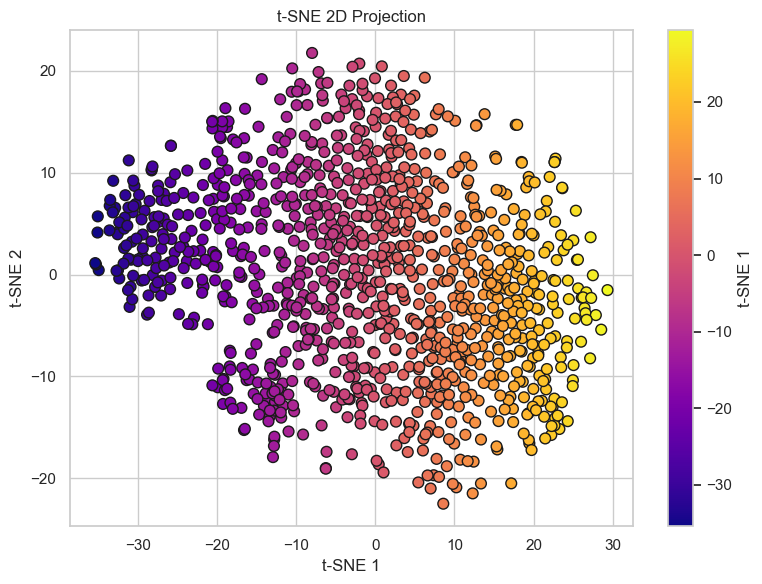

In [47]:
# Run t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Visualize t-SNE
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=X_tsne[:, 0], cmap='plasma', s=60, edgecolor='k')
plt.title("t-SNE 2D Projection")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.colorbar(label="t-SNE 1")
plt.grid(True)
plt.tight_layout()
plt.show()

 97%|=================== | 1064/1092 [00:34<00:00]       

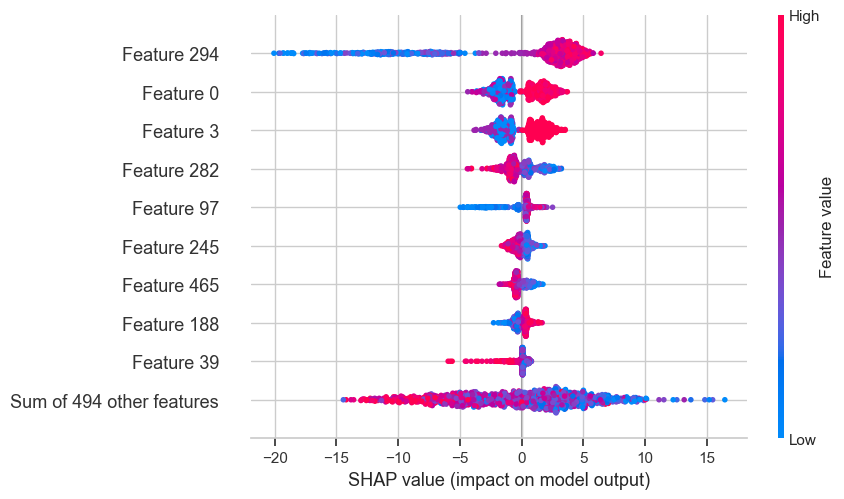

In [50]:
# Explain t-SNE1 using SHAP
target_tsne1 = X_tsne[:, 0]
tsne_model = RandomForestRegressor(random_state=42)
tsne_model.fit(X_scaled, target_tsne1)

tsne_shap = shap.Explainer(tsne_model, X_scaled)
tsne_shap_values = tsne_shap(X_scaled, check_additivity=False)

shap.plots.beeswarm(tsne_shap_values, max_display=10)


In [52]:
# LIME on t-SNE1
lime_exp_tsne = lime_tabular.LimeTabularExplainer(X_scaled, feature_names=feature_names, mode='regression')
lime_tsne = lime_exp_tsne.explain_instance(X_scaled[0], tsne_model.predict, num_features=10)
lime_tsne.show_in_notebook()


C:\Users\kashi\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


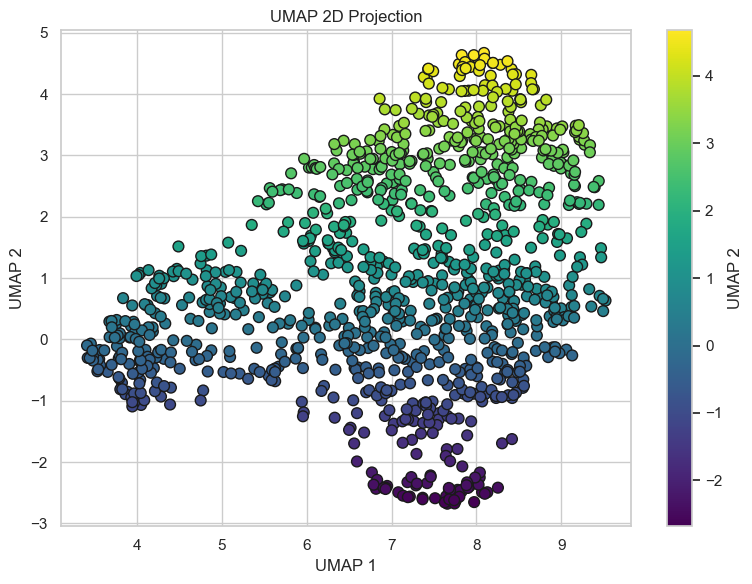

In [54]:
# Run UMAP
umap_model = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_model.fit_transform(X_scaled)

# Visualize UMAP
plt.figure(figsize=(8, 6))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=X_umap[:, 1], cmap='viridis', s=60, edgecolor='k')
plt.title("UMAP 2D Projection")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.colorbar(label="UMAP 2")
plt.grid(True)
plt.tight_layout()
plt.show()


 99%|===================| 1086/1092 [00:33<00:00]        

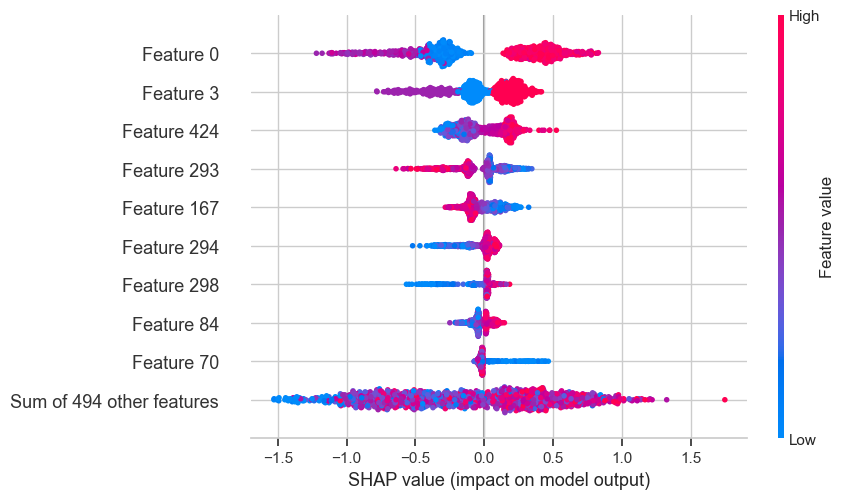

In [56]:
# Explain UMAP2 using SHAP
target_umap2 = X_umap[:, 1]
umap_model_shap = RandomForestRegressor(random_state=42)
umap_model_shap.fit(X_scaled, target_umap2)

umap_explainer = shap.Explainer(umap_model_shap, X_scaled)
umap_shap_values = umap_explainer(X_scaled, check_additivity=False)

shap.plots.beeswarm(umap_shap_values, max_display=10)

In [58]:
# LIME on UMAP2
lime_exp_umap = lime_tabular.LimeTabularExplainer(X_scaled, feature_names=feature_names, mode='regression')
lime_umap = lime_exp_umap.explain_instance(X_scaled[0], umap_model_shap.predict, num_features=10)
lime_umap.show_in_notebook()
